# University in Japan - Mental Health status on Students

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Package for encoding
from sklearn.preprocessing import LabelEncoder
# Import scikit.learn to use test and training function
from sklearn.model_selection import train_test_split
# Package for LR Model
from sklearn.linear_model import LogisticRegression
# Other packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [81]:
#read the data file
path = '/content/Mental Health Data_Cleaned.csv'
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)

### Exploratory Data Analysis

In [82]:
#First rows of dataset
df.head()

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,English,English_cate,Intimate,Religion,Suicide,Dep,DepType,Total Depression,DepSev,Total Social Connectedness,Percieved Discrimination,Homesickness,Perceived Hatred,Fear,Culture Shock,Guilt,Miscellaneous,Total Acculturation,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Partner_bi,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24,4,5,Long,3,Average,5,High,NaN,1,0,0,No,0,Min,34,23,9,11,8,11,2,27,91,5,5,6,3,2,1,4,1,3,4,1,1,1,0,0,0,0,0,0,0,0
1,Inter,SEA,Male,Grad,28,5,1,Short,4,High,4,High,NaN,0,0,0,No,2,Min,48,8,7,5,4,3,2,10,39,7,7,7,4,4,4,4,1,1,1,1,1,1,0,0,0,0,0,0,0,0
2,Inter,SEA,Male,Grad,25,4,6,Long,4,High,4,High,1.0,1,0,0,No,2,Min,41,13,4,7,6,4,3,14,51,3,3,3,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,Inter,EA,Female,Grad,29,5,1,Short,2,Low,3,Average,0.0,0,0,0,No,3,Min,37,16,10,10,8,6,4,21,75,5,5,5,5,5,2,2,2,4,4,1,1,1,1,1,0,0,0,0,0,0
4,Inter,EA,Female,Grad,28,5,1,Short,1,Low,3,Average,1.0,0,0,0,No,3,Min,37,15,12,5,8,7,4,31,82,5,5,5,2,5,2,5,5,4,4,1,1,1,0,1,0,1,1,0,0,0


In [83]:
# Last rows of dataset
df.tail()

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,English,English_cate,Intimate,Religion,Suicide,Dep,DepType,Total Depression,DepSev,Total Social Connectedness,Percieved Discrimination,Homesickness,Perceived Hatred,Fear,Culture Shock,Guilt,Miscellaneous,Total Acculturation,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Partner_bi,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
263,Dom,JAP,Female,Under,21,3,4,Long,5,High,4,High,0.0,1,0,0,No,8,Mild,27,16,9,10,8,7,4,20,74,1,7,5,1,3,3,3,1,1,1,0,1,1,0,0,0,0,0,0,0,1
264,Dom,JAP,Female,Under,22,3,3,Medium,3,Average,4,High,1.0,1,0,0,No,2,Min,48,8,10,5,4,3,4,16,50,7,7,7,7,2,2,2,2,2,1,1,1,1,1,0,0,0,0,0,0,0
265,Dom,JAP,Female,Under,19,2,1,Short,5,High,3,Average,0.0,0,0,0,No,9,Mild,47,8,7,5,5,3,2,13,43,5,7,7,6,7,7,7,1,1,1,1,1,1,1,1,1,1,0,0,0,0
266,Dom,JAP,Male,Under,19,2,1,Short,5,High,3,Average,0.0,0,0,0,No,1,Min,43,8,12,5,4,3,2,10,44,7,5,7,5,5,5,5,4,4,4,1,1,1,1,1,1,1,0,0,0,0
267,Dom,JAP,Male,Under,20,2,2,Medium,5,High,3,Average,0.0,0,1,0,No,7,Mild,41,14,4,10,7,3,4,19,61,5,6,4,4,4,4,4,4,6,1,1,1,0,0,0,0,0,0,1,0,0


In [84]:
#Display Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   inter_dom                   268 non-null    object 
 1   Region                      268 non-null    object 
 2   Gender                      268 non-null    object 
 3   Academic                    268 non-null    object 
 4   Age                         268 non-null    int64  
 5   Age_cate                    268 non-null    int64  
 6   Stay                        268 non-null    int64  
 7   Stay_Cate                   268 non-null    object 
 8   Japanese                    268 non-null    int64  
 9   Japanese_cate               268 non-null    object 
 10  English                     268 non-null    int64  
 11  English_cate                268 non-null    object 
 12  Intimate                    260 non-null    float64
 13  Religion                    268 non

In [85]:
# Identify null values
df.isnull().sum()

inter_dom                     0
Region                        0
Gender                        0
Academic                      0
Age                           0
Age_cate                      0
Stay                          0
Stay_Cate                     0
Japanese                      0
Japanese_cate                 0
English                       0
English_cate                  0
Intimate                      8
Religion                      0
Suicide                       0
Dep                           0
DepType                       0
Total Depression              0
DepSev                        0
Total Social Connectedness    0
Percieved Discrimination      0
Homesickness                  0
Perceived Hatred              0
Fear                          0
Culture Shock                 0
Guilt                         0
Miscellaneous                 0
Total Acculturation           0
Partner                       0
Friends                       0
Parents                       0
Relative

In [86]:
# Drop NaN values
# Necessary to drop because Nan values from "Intimate" because we will use it as an independent variable
mental_health = df.dropna()

In [87]:
mental_health.isnull().sum()

inter_dom                     0
Region                        0
Gender                        0
Academic                      0
Age                           0
Age_cate                      0
Stay                          0
Stay_Cate                     0
Japanese                      0
Japanese_cate                 0
English                       0
English_cate                  0
Intimate                      0
Religion                      0
Suicide                       0
Dep                           0
DepType                       0
Total Depression              0
DepSev                        0
Total Social Connectedness    0
Percieved Discrimination      0
Homesickness                  0
Perceived Hatred              0
Fear                          0
Culture Shock                 0
Guilt                         0
Miscellaneous                 0
Total Acculturation           0
Partner                       0
Friends                       0
Parents                       0
Relative

In [88]:
mental_health.describe()

,Age,Age_cate,Stay,Japanese,English,Intimate,Religion,Suicide,Dep,Total Depression,Total Social Connectedness,Percieved Discrimination,Homesickness,Perceived Hatred,Fear,Culture Shock,Guilt,Miscellaneous,Total Acculturation,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Partner_bi,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,20.857692,2.557692,2.153846,3.119231,3.634615,0.396154,0.338462,0.230769,0.365385,8.319231,37.576923,15.376923,9.615385,9.169231,7.257692,6.076923,3.803846,21.023077,72.323077,4.326923,4.053846,4.350000,3.050000,2.934615,2.280769,2.665385,1.919231,2.915385,2.130769,0.538462,0.476923,0.503846,0.242308,0.223077,0.111538,0.173077,0.069231,0.234615,0.073077,0.173077
std,2.736663,1.058400,1.323745,1.308280,0.883763,0.490040,0.474099,0.422138,0.482467,4.921195,9.250996,6.166625,4.003637,4.213672,3.120325,2.577345,1.904066,7.358934,22.565808,2.232795,1.936488,2.065669,1.837354,1.822096,1.525211,1.721865,1.396775,2.013601,1.495881,0.499480,0.500430,0.500949,0.429306,0.417112,0.315405,0.379043,0.254336,0.424575,0.260765,0.379043
min,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,4.000000,5.000000,4.000000,3.000000,2.000000,10.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,31.750000,9.750000,6.000000,5.000000,4.000000,3.000000,2.000000,15.000000,56.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,2.000000,2.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,8.000000,40.000000,16.000000,9.500000,9.000000,7.000000,6.000000,4.000000,20.000000,72.000000,5.000000,4.000000,5.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,3.000000,3.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000,11.000000,46.000000,19.000000,12.000000,11.000000,9.000000,8.000000,5.000000,26.000000,87.250000,7.000000,5.000000,6.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,5.000000,10.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,25.000000,48.000000,39.000000,20.000000,25.000000,17.000000,13.000000,10.000000,47.000000,145.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
mental_health.groupby('Suicide').mean()

,Age,Age_cate,Stay,Japanese,English,Intimate,Religion,Dep,Total Depression,Total Social Connectedness,Percieved Discrimination,Homesickness,Perceived Hatred,Fear,Culture Shock,Guilt,Miscellaneous,Total Acculturation,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Partner_bi,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
Suicide,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20.895000,2.56,2.085000,3.175000,3.665000,0.395,0.345000,0.28,6.87,39.855000,14.385000,9.315000,8.520000,6.665000,5.845,3.495000,20.305000,68.530000,4.53,4.245000,4.705000,3.29,2.995000,2.265000,2.710000,1.895,2.65,1.99,0.585000,0.540000,0.575000,0.285,0.240000,0.110000,0.185000,0.070000,0.175000,0.055000,0.155000
1,20.733333,2.55,2.383333,2.933333,3.533333,0.400,0.316667,0.65,13.15,29.983333,18.683333,10.616667,11.333333,9.233333,6.850,4.833333,23.416667,84.966667,3.65,3.416667,3.166667,2.25,2.733333,2.333333,2.516667,2.000,3.80,2.60,0.383333,0.266667,0.266667,0.100,0.166667,0.116667,0.133333,0.066667,0.433333,0.133333,0.233333


In [90]:
# Check to see if it is balanced
mental_health.Suicide.value_counts()

0    200
1     60
Name: Suicide, dtype: int64

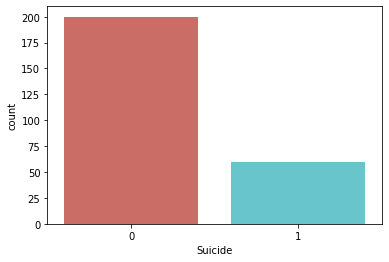

In [91]:
# Visualization of the imbalanced dataset
sns.countplot(x='Suicide', data=mental_health, palette='hls')
plt.show()

We need to increase our dataset with Smote

### SMOTE

In [92]:
# Identify our columns
mental_health.columns

Index(['inter_dom', 'Region', 'Gender', 'Academic', 'Age', 'Age_cate', 'Stay',
       'Stay_Cate', 'Japanese', 'Japanese_cate', 'English', 'English_cate',
       'Intimate', 'Religion', 'Suicide', 'Dep', 'DepType', 'Total Depression',
       'DepSev', 'Total Social Connectedness', 'Percieved Discrimination',
       'Homesickness', 'Perceived Hatred', 'Fear', 'Culture Shock', 'Guilt',
       'Miscellaneous', 'Total Acculturation', 'Partner', 'Friends', 'Parents',
       'Relative', 'Profess', ' Phone', 'Doctor', 'Reli', 'Alone', 'Others',
       'Partner_bi', 'Friends_bi', 'Parents_bi', 'Relative_bi',
       'Professional_bi', 'Phone_bi', 'Doctor_bi', 'religion_bi', 'Alone_bi',
       'Others_bi', 'Internet_bi'],
      dtype='object')

In [93]:
# x will be independent variables
# we are trying to predict y, which will be our independent variable

X = mental_health[['Age_cate', 'Stay', 'Japanese', 'English', 'Intimate', 'Religion', 'Dep', 'Total Depression',
                   'Total Social Connectedness', 'Percieved Discrimination', 'Homesickness', 'Perceived Hatred', 'Fear', 'Culture Shock', 'Guilt', 'Miscellaneous',
                   'Total Acculturation', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess', ' Phone', 'Doctor', 'Reli', 'Alone', 'Others']]

y = mental_health['Suicide']

In [94]:
# Splitting in Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [95]:
# Count on how imbalanced our dataset is
np.bincount(y_train)

array([141,  41])

Fitting a logistic classifier

In [96]:
# Inserting into the model
# Source https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = LogisticRegression(penalty = 'l2', solver='liblinear', C=1, random_state=0)
fit_model = model.fit(X_train, y_train)
y_pred = fit_model.predict(X_test)

In [97]:
#Classification Report
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[52  7]
 [10  9]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        59
           1       0.56      0.47      0.51        19

    accuracy                           0.78        78
   macro avg       0.70      0.68      0.69        78
weighted avg       0.77      0.78      0.78        78



In [98]:
# Display feature importance on Suicide
feature_suicide = pd.DataFrame({'feature':list(X_train.columns), 'feature_suicide':[abs(i) for i in model.coef_[0]]})
feature_suicide.sort_values('feature_suicide', ascending = False)

,feature,feature_suicide
19,Parents,0.471416
7,Total Depression,0.467605
21,Profess,0.428506
22,Phone,0.421333
24,Reli,0.379578
20,Relative,0.369836
23,Doctor,0.353141
4,Intimate,0.314211
25,Alone,0.305962
3,English,0.235907


In [99]:
#Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='not minority', random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [107]:
sm2 = SMOTE(sampling_strategy='all', random_state=101)
X_res2, y_res2 = sm2.fit_resample(X_res, y_res)

In [108]:
X_res2.count()

Age_cate                      282
Stay                          282
Japanese                      282
English                       282
Intimate                      282
Religion                      282
Dep                           282
Total Depression              282
Total Social Connectedness    282
Percieved Discrimination      282
Homesickness                  282
Perceived Hatred              282
Fear                          282
Culture Shock                 282
Guilt                         282
Miscellaneous                 282
Total Acculturation           282
Partner                       282
Friends                       282
Parents                       282
Relative                      282
Profess                       282
 Phone                        282
Doctor                        282
Reli                          282
Alone                         282
Others                        282
dtype: int64

In [109]:
y_res2.count()

282

In [103]:
sm3 = SMOTE(sampling_strategy='all', random_state=101)
X_res3, y_res3 = sm3.fit_resample(X_res2, y_res2)

In [104]:
#Count on the dataset
np.bincount(y_res)

array([141,  41])

Create another logistic model with resampled data

In [105]:
model1 = LogisticRegression(penalty = 'l2', solver='liblinear', C=1, random_state=0)
fit_model1 = model.fit(X_res, y_res)
y_pred1 = fit_model1.predict(X_test)

In [106]:
print(confusion_matrix(y_test, y_pred1))
print (classification_report(y_test, y_pred1))

[[52  7]
 [10  9]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        59
           1       0.56      0.47      0.51        19

    accuracy                           0.78        78
   macro avg       0.70      0.68      0.69        78
weighted avg       0.77      0.78      0.78        78



Recall has increased from 47% to 68%. 